In [1]:
import h5py
import torch
import matplotlib.pyplot as plt
import os

In [ ]:
asci_histogram = torch.zeros(
    (
        512 * 512,
        360,
    ),
    dtype=torch.int32,
)
input_dir = "output"

for layout_idx in range(24):

    asci_histogram_filename = os.path.join(
        input_dir, f"asci_histogram_{layout_idx:02d}.hdf5"
    )
    with h5py.File(asci_histogram_filename, "r") as f:
        layout_asci_histogram = torch.from_numpy(f["asci_histogram"][:])
    asci_histogram += layout_asci_histogram


In [15]:
asci_map = torch.count_nonzero(asci_histogram, dim=1)/360.0
print(asci_map.shape)

torch.Size([262144])


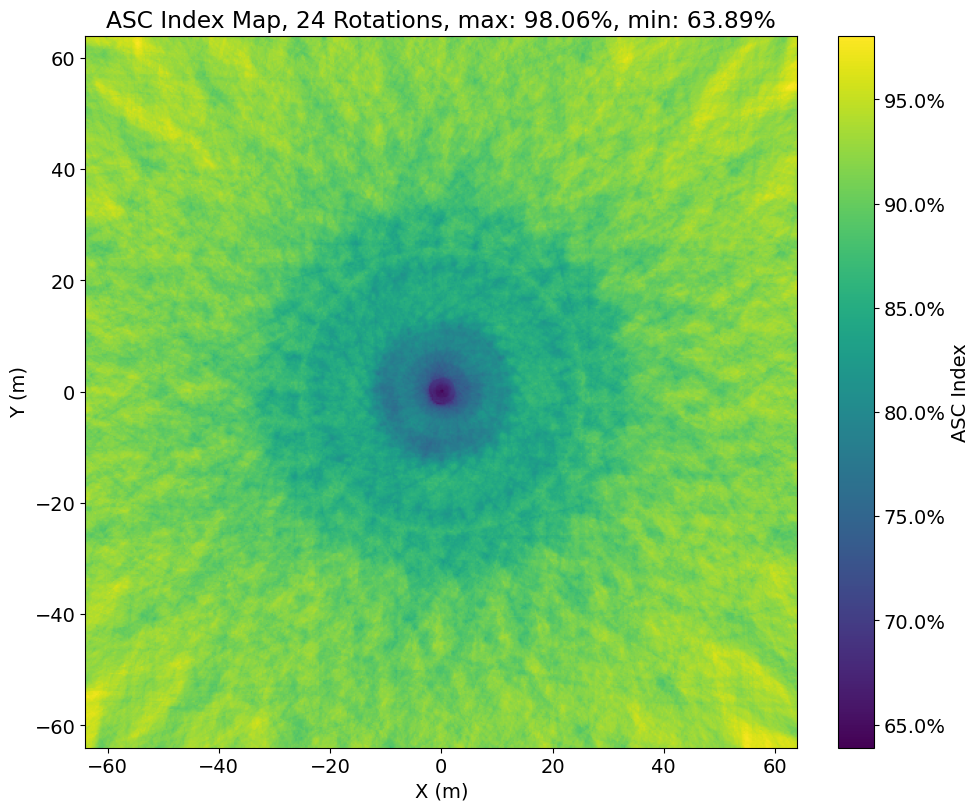

In [27]:
plot_dir = "plots"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

plt.rcParams["font.size"] = 14
fig, ax = plt.subplots(
    figsize=(10, 8),
    layout="constrained",
)
cbar = fig.colorbar(
    ax.imshow(
        asci_map.view(512, 512).T,
        extent=(-64, 64, -64, 64),
        origin="lower",
    ),
    ax=ax,
    label="ASC Index",
    # shrink=0.92,
)
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_title(
    f"ASC Index Map, 24 Rotations, max: {asci_map.max().item():.2%}, min: {asci_map.min().item():.2%}"
)
from matplotlib.ticker import PercentFormatter

cbar.formatter = PercentFormatter(xmax=1.0, decimals=1)
cbar.update_ticks()
out_figure_filename = os.path.join(plot_dir, "asci_map_24_rotations.png")
plt.savefig(out_figure_filename, dpi=300)

In [28]:
asci_histogram = torch.zeros(
    (
        512 * 512,
        360,
    ),
    dtype=torch.int32,
)
input_dir = "output"

for layout_idx in range(1):

    asci_histogram_filename = os.path.join(
        input_dir, f"asci_histogram_{layout_idx:02d}.hdf5"
    )
    with h5py.File(asci_histogram_filename, "r") as f:
        layout_asci_histogram = torch.from_numpy(f["asci_histogram"][:])
    asci_histogram += layout_asci_histogram

asci_map = torch.count_nonzero(asci_histogram, dim=1)/360.0

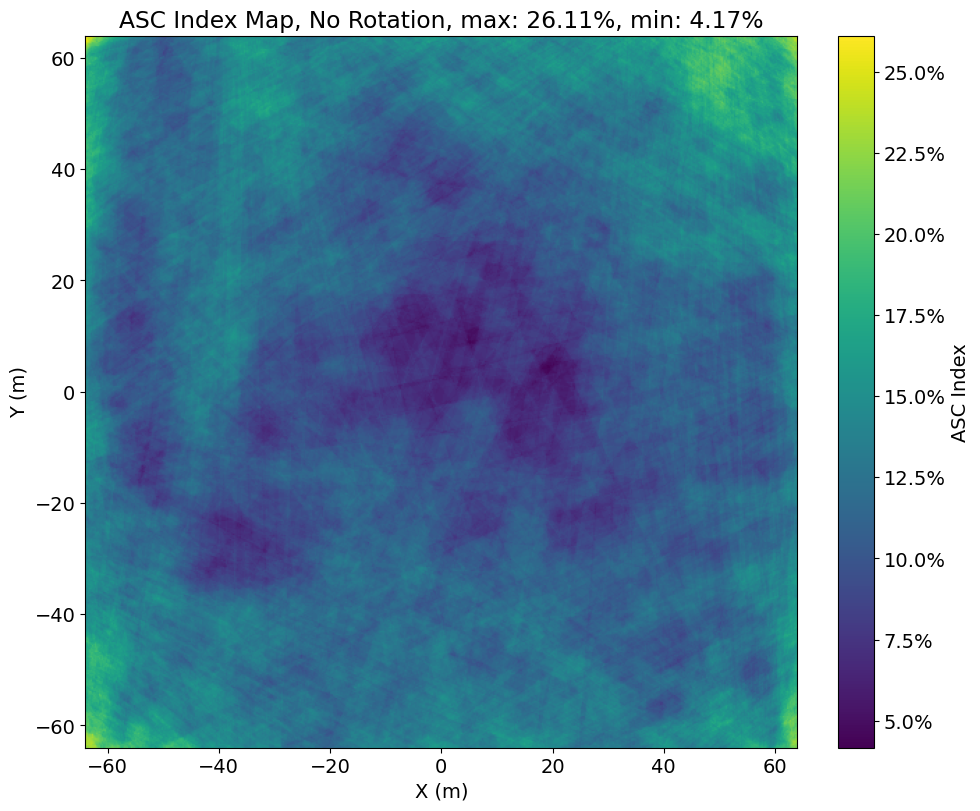

In [29]:
fig, ax = plt.subplots(
    figsize=(10, 8),
    layout="constrained",
)
cbar = fig.colorbar(
    ax.imshow(
        asci_map.view(512, 512).T,
        extent=(-64, 64, -64, 64),
        origin="lower",
    ),
    ax=ax,
    label="ASC Index",
    # shrink=0.92,
)
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_title(
    f"ASC Index Map, No Rotation, max: {asci_map.max().item():.2%}, min: {asci_map.min().item():.2%}"
)
from matplotlib.ticker import PercentFormatter

cbar.formatter = PercentFormatter(xmax=1.0, decimals=1)
cbar.update_ticks()
out_figure_filename = os.path.join(plot_dir, "asci_map_no_rotations.png")
plt.savefig(out_figure_filename, dpi=300)